In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
import numpy as np
from data_pipeline2 import load_dataset
from model_builders import build_model
from training import train_with_cv
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from evaluate import plot_acc_loss
import time

In [2]:
architectures = ["VGG16", "ResNet101", "DenseNet121", "InceptionV3", "Xception"]
classifier_heads = ["softmax", "svm", "rf"]
results = []

In [3]:
X, y, label_map = load_dataset("../data/Brain Cancer Dataset/Training", 
                                add_noise=True,
                                augment = True, 
                                augment_factor=2)
X = np.repeat(X, 3, axis=-1)  # Convert to RGB by repeating the single channel
num_classes = len(label_map)

Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed image shape: (224, 224)
Processed imag

In [4]:
from collections import Counter

print(Counter(y))

Counter({3: 4785, 4: 4371, 2: 4017, 1: 3963})


In [5]:
y = y - 1

label_map_zero_base = {k: v-1 for k, v in label_map.items()}
inverse_label_map = {v: k for k, v in label_map_zero_base.items()}

In [6]:
print(np.unique(y))

[0 1 2 3]


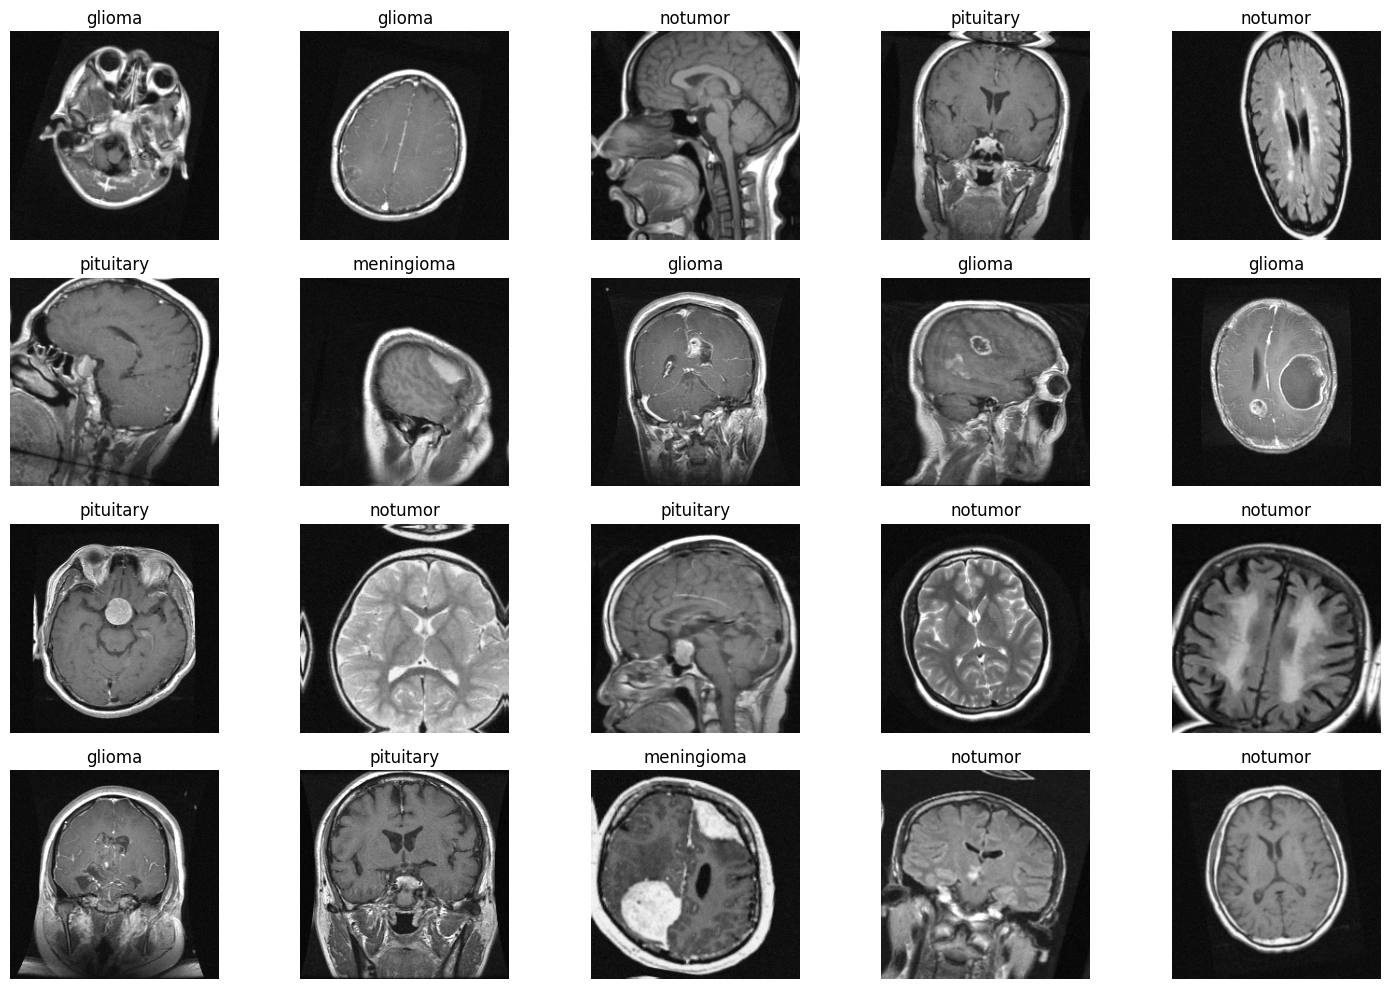

In [7]:
# sanity check the images 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
indices = np.random.choice(len(X), size=20, replace=False)


for i, idx in enumerate(indices):
    plt.subplot(4, 5, i + 1)
    # X images are normalized floats? 
    img = X[idx]
    if img.shape[-1] == 3: 
        img_disp = img[..., 0]
    else:
        img_disp = img.squeeze()

    #undo normalisation roughly for visualisation
    img_disp = (img_disp - img_disp.min()) / (img_disp.max() - img_disp.min())

    plt.imshow(img_disp, cmap = 'gray')
    plt.title(inverse_label_map[y[idx]])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [8]:
for arch_name in architectures:
    for clf_head in classifier_heads:
        print(f"\n=== Training {arch_name} with {clf_head.upper()} classifier ===")
        try:
            build_fn = lambda: build_model(arch_name, num_classes=num_classes, classifier_head=clf_head)
            models, df_metrics, histories = train_with_cv(
                arch_name=arch_name,
                build_fn=build_fn, 
                X=X, 
                y=y,
                classifier_head=clf_head,
                folds=10,
                epochs=10,
                batch_size=32,
            )

            results.append(df_metrics)

        except Exception as e:
            print(f"Error training {arch_name} with {clf_head.upper()} classifier: {e}")



=== Training VGG16 with SOFTMAX classifier ===
Fold 1/10


2025-07-16 19:55:55.547061: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-07-16 19:55:55.550199: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-16 19:55:55.550213: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-16 19:55:55.550232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-16 19:55:55.550247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-07-16 19:56:26.809275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


386/386 ━━━━━━━━━━━━━━━━━━━━ 108s 276ms/step - accuracy: 0.3132 - loss: 1.4094 - val_accuracy: 0.0000e+00 - val_loss: 3.1953
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 267ms/step - accuracy: 0.3186 - loss: 1.3064 - val_accuracy: 0.0000e+00 - val_loss: 3.0149
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 266ms/step - accuracy: 0.3230 - loss: 1.2860 - val_accuracy: 0.0000e+00 - val_loss: 3.2179
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 268ms/step - accuracy: 0.3264 - loss: 1.2725 - val_accuracy: 0.0000e+00 - val_loss: 3.0717
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 102s 264ms/step - accuracy: 0.3372 - loss: 1.2741 - val_accuracy: 0.0000e+00 - val_loss: 3.0777
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 268ms/step - accuracy: 0.3362 - loss: 1.2755 - val_accuracy: 0.0000e+00 - val_loss: 3.2154
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 267ms/step - accuracy: 0.3416 - loss: 1.2767 - val_accuracy: 0.0000e+00 - val_loss: 3.3297
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 103s 268ms/step - a

KeyboardInterrupt: 

In [16]:
from collections import Counter

print(Counter(y))

Counter({2: 4785, 3: 4371, 1: 4017, 0: 3963})


In [9]:
build_fun = lambda: build_model("VGG16", num_classes=num_classes, classifier_head="softmax")
models, df_metrics, histories = train_with_cv(
    arch_name="VGG16",
    build_fn=build_fun,
    X=X,
    y=y,
    classifier_head="softmax",
    folds=2,
    epochs=5,
    batch_size=32,
)

Fold 1/2
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 60s 276ms/step - accuracy: 0.5781 - loss: 1.0062 - val_accuracy: 0.2497 - val_loss: 1.4012
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 57s 265ms/step - accuracy: 0.7885 - loss: 0.5318 - val_accuracy: 0.5309 - val_loss: 1.0241
Epoch 3/5
163/215 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.8326 - loss: 0.4416

KeyboardInterrupt: 

In [10]:
histories

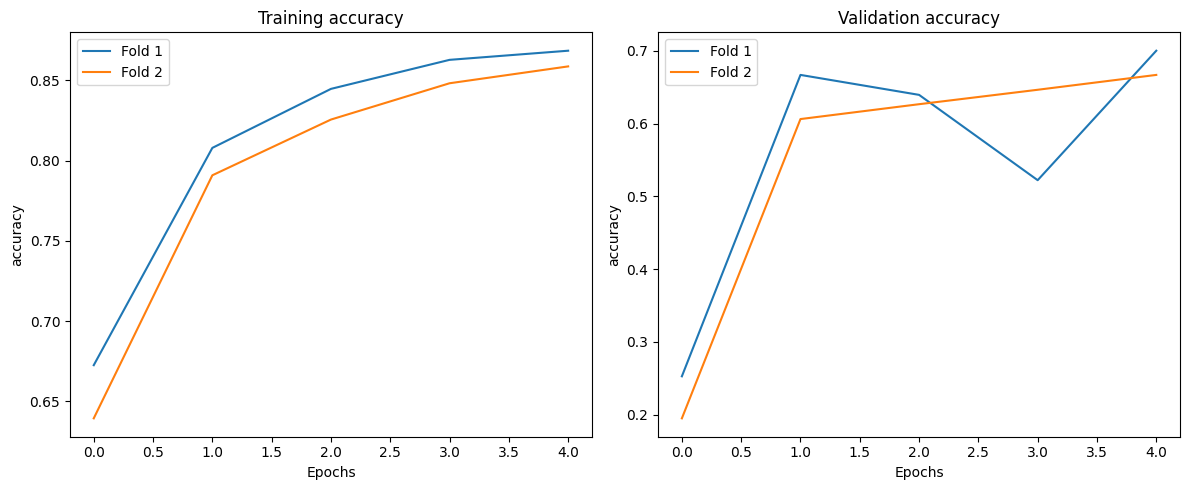

In [13]:
plt.figure(figsize=(12, 5))

for i, history in enumerate(histories):
    history_dict = history.history

    # plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label=f'Fold {i+1}')
    plt.title(f"Training {'accuracy'}")
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_dict['val_' + 'accuracy'], label=f'Fold {i+1}')
    plt.title(f"Validation {'accuracy'}")
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

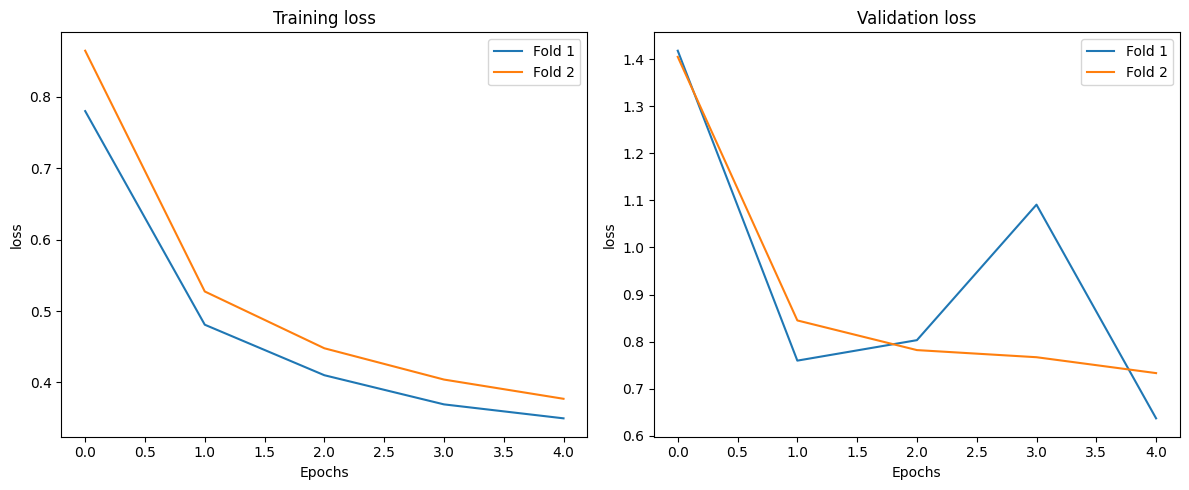

In [14]:
plt.figure(figsize=(12, 5))

for i, history in enumerate(histories):
    history_dict = history.history

    # plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label=f'Fold {i+1}')
    plt.title(f"Training {'loss'}")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_dict['val_' + 'loss'], label=f'Fold {i+1}')
    plt.title(f"Validation {'loss'}")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Compute mean across folds
avg_results = all_results.groupby(['Architecture', 'Classifier']).mean(numeric_only=True).reset_index()

# Compute standard deviation across folds
std_results = all_results.groupby(['Architecture', 'Classifier']).std(numeric_only=True).reset_index()

# Optionally, rename columns for clarity
std_results = std_results.rename(columns={
    col: f"{col}_std" for col in std_results.columns if col not in ['Architecture', 'Classifier']
})

# Merge mean and std into one DataFrame
summary_results = pd.merge(avg_results, std_results, on=['Architecture', 'Classifier'])


In [17]:
summary_results = summary_results.sort_values(by='Accuracy', ascending=False)
summary_results

,Architecture,Classifier,Fold,Accuracy,Precision,Recall,Specificity,F1 Score,ROC AUC,training_time,Fold_std,Accuracy_std,Precision_std,Recall_std,Specificity_std,F1 Score_std,ROC AUC_std,training_time_std
2,DenseNet121,svm,5.5,0.921570,0.921714,0.918123,0.974049,0.918660,0.989629,1097.224751,3.02765,0.011944,0.011610,0.010391,0.003915,0.011307,0.002092,0.0
0,DenseNet121,rf,5.5,0.919819,0.918884,0.916345,0.973476,0.916517,0.989855,1080.318468,3.02765,0.009786,0.010752,0.009144,0.003092,0.010328,0.001672,0.0
9,VGG16,rf,5.5,0.916844,0.916847,0.913626,0.972461,0.913858,0.988320,491.390807,3.02765,0.012749,0.013545,0.011950,0.004008,0.013267,0.001904,0.0
14,Xception,svm,5.5,0.916493,0.914920,0.913012,0.972479,0.912831,0.987401,1071.032984,3.02765,0.010163,0.010892,0.009257,0.003133,0.010573,0.002491,0.0
5,InceptionV3,svm,5.5,0.908615,0.906487,0.904629,0.969872,0.904401,0.985588,963.463073,3.02765,0.009643,0.009796,0.008990,0.003231,0.009215,0.002322,0.0
11,VGG16,svm,5.5,0.881304,0.884617,0.876763,0.960769,0.877378,0.975440,466.983289,3.02765,0.011345,0.012697,0.010440,0.003405,0.012390,0.002119,0.0
6,ResNet101,rf,5.5,0.875354,0.871405,0.870237,0.958791,0.869405,0.976526,892.575843,3.02765,0.015860,0.015849,0.014632,0.005178,0.015435,0.003581,0.0
1,DenseNet121,softmax,5.5,0.869927,0.885895,0.869089,0.957332,0.868009,0.980708,4425.143185,3.02765,0.029726,0.017198,0.027232,0.009574,0.030020,0.003647,0.0
13,Xception,softmax,5.5,0.866950,0.877741,0.864208,0.956222,0.864185,0.979513,4884.641895,3.02765,0.018465,0.014915,0.020268,0.005982,0.019827,0.002699,0.0
12,Xception,rf,5.5,0.863796,0.859946,0.858586,0.954935,0.857605,0.972414,880.853947,3.02765,0.013382,0.014754,0.012511,0.004295,0.013540,0.002977,0.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=summary_results,
    x="Architecture",
    y="Accuracy",
    hue="Classifier",
    capsize=0.1
)
plt.title("Mean Accuracy by Architecture and Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'summary_results' is not defined

<Figure size 1200x600 with 0 Axes>